## **Assignment Two (EECS3404 W25)**

**your name:** arianne ghislaine rull \\
**your student number:** 219129527 \\
**your yorku email: arull@yorku.ca**

This assignment is mainly for you to review linear models. You have to work individually. Remember to fill in your information (name, student number, email) at above.



##**What to Submit**

Please use this notebook to complete this assignment. You have to run your codes and show the results in this notebook. Download the completed notenook as `.ipynb` and compress it as a `.zip` file to submit to eClass.  Submit only ONE notebook file that contains all of your answers and codes to eClass before the deadline.  No late submission
will be accepted.

* For all written parts, write your answers in text cells. To avoid confusions in marking, better to embed latex codes there to represent all mathematical notations and equations.  **No handwriting is accepted**.

* For programming parts, you should give codes, comments, explanations and the proper running outputs in both code and text cells. Make your jupyter notebook clean and concise. Remove all unused codes and all intermediate results from the submitted notebook. The submitted notebook should include only the final (best) outputs for each question. Also make sure every code cell runnable so that markers can reproduce the outputs if necessary.

### **Q1** (10 marks)  **Data Visualization** ###

1.   Use all MNIST training images of 10 digits to learn the PCA and LDA methods as in [Project 1](https://colab.research.google.com/drive/1tWzk_otlijpm7zwlBTzwWKdlb1Nwwo8v), and then use the learned PCA and LDA models to  project all MNIST images of 10 digits into 2D and 3D spaces, where you plot each digit in a different color for data visualization. Explain how these methods differ in data visualization.  (For PCA, show the results for both `sciki-learn` and `my_PCA` implementations.)

2.   Use all MNIST training images of 10 digits to learn the *t-SNE* method as in [Project 1](https://colab.research.google.com/drive/1tWzk_otlijpm7zwlBTzwWKdlb1Nwwo8v), and then use the learned *t-SNE* model to project them into a 2D space for data visualization, where you plot each digit in a different color for data visualization. Compare it with that of PCA and LDA and discuss your findings. (**NOTE: The training time of t-SNE may be long due to the large quantity of training samples. Be patient.**)



In [3]:
# Write your code for Q1 here

In [4]:

!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null

#install python_mnist

!pip install python_mnist


Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte


In [5]:
from mnist import MNIST
import numpy as np

mnist_loader = MNIST('MNIST')
train_data, train_label = mnist_loader.load_training()

train_data = np.array(train_data)
train_label = np.array(train_label)

print(train_data.shape)
print(train_label.shape)

(60000, 784)
(60000,)


PCA Implementation

In [6]:
##### PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [7]:
##### pca algorithm
##### input: train_data, n_components
##### output: projected data (X_pca), projection matrix (W), and eigenvalues (eigvals)

#### 1: mean-center the data
#### 2: compute the covariance matrix
####### divide by N or (N-1) depending on the convention
#### 3: eigen decomposition
#### 4: sort by largest eigenvalue
#### 5: take top n_components
#### 6: project the data

def pca_implementation(train_data, n_components):
#### 1: mean-center the data
  mean_vec = np.mean(train_data, axis=0)
  train_data_centered = train_data - mean_vec

#### 2: compute the covariance matrix
###### divide by N or (N-1) depending on convention
  n_samples = train_data_centered.shape[0]  # Number of samples
  Cov = (train_data_centered.T @ train_data_centered) /  n_samples

#### 3: eigen decomposition
  eig_vals, eig_vecs = np.linalg.eigh(Cov)


#### 4: sort by largest eigenvalue / descending order
  idx = np.argsort(-eig_vals)
  eig_vals = eig_vals[idx]
  eig_vecs = eig_vecs[:, idx]

#### 5: take the top n_components
  W = eig_vecs[:, :n_components]

#### 6: project the data
  # X_pca = train_data_centered @ W
  X_pca = np.real(train_data_centered @ W)

  return X_pca, W, eig_vals

In [8]:
"""
    Plots a 2D scatter of all digits (0-9), each with a unique color/marker.
    X_2D: (num_samples, 2)
    y: (num_samples,)
    """

def plot_2D(X_2D, y, title="2D Scatter"):

    digits = np.unique(y)

    # Some distinct colors/markers for digits
    colors = ['red','blue','green','orange','purple','brown','pink','gray','olive','cyan']
    markers = ['o','^','s','d','v','<','>','x','+','*']

    plt.figure(figsize=(8,6))
    for i, digit in enumerate(digits):
        idx = (y == digit)
        plt.scatter(X_2D[idx, 0], X_2D[idx, 1],
                    c=colors[i], marker=markers[i],
                    alpha=0.5, label=str(digit))
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()


"""
    Plots a 3D scatter of all digits (0-9).
    X_3D: (num_samples, 3)
    y: (num_samples,)
    """

def plot_3D(X_3D, y, title="3D Scatter"):

    from mpl_toolkits.mplot3d import Axes3D

    digits = np.unique(y)
    colors = ['red','blue','green','orange','purple','brown','pink','gray','olive','cyan']
    markers = ['o','^','s','d','v','<','>','x','+','*']

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    for i, digit in enumerate(digits):
        idx = (y == digit)
        ax.scatter(X_3D[idx, 0], X_3D[idx, 1], X_3D[idx, 2],
                   c=colors[i], marker=markers[i], alpha=0.5, label=str(digit))

    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    ax.legend()
    plt.show()


Total Explained Variance: 95.02%


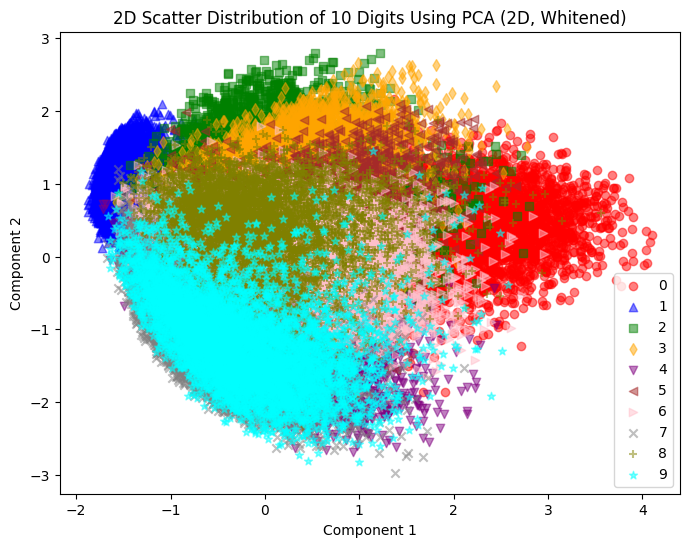

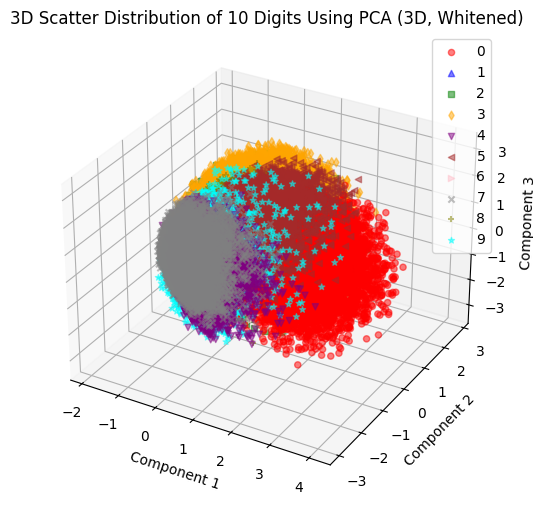

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. PCA with Retained Variance (95% of the original variance)
pca = PCA(n_components=0.95, whiten=True)
X_pca = pca.fit_transform(train_data)

# Explained variance ratio to check how much variance is retained
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total Explained Variance: {explained_variance * 100:.2f}%")

####### 2D Visualization (for comparison)
pca_2 = PCA(n_components=2, whiten=True)
X_pca_2 = pca_2.fit_transform(train_data)
plot_2D(X_pca_2, train_label, title="2D Scatter Distribution of 10 Digits Using PCA (2D, Whitened)")

#######3D Visualization (for comparison)
pca_3 = PCA(n_components=3, whiten=True)
X_pca_3 = pca_3.fit_transform(train_data)
plot_3D(X_pca_3, train_label, title="3D Scatter Distribution of 10 Digits Using PCA (3D, Whitened)")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


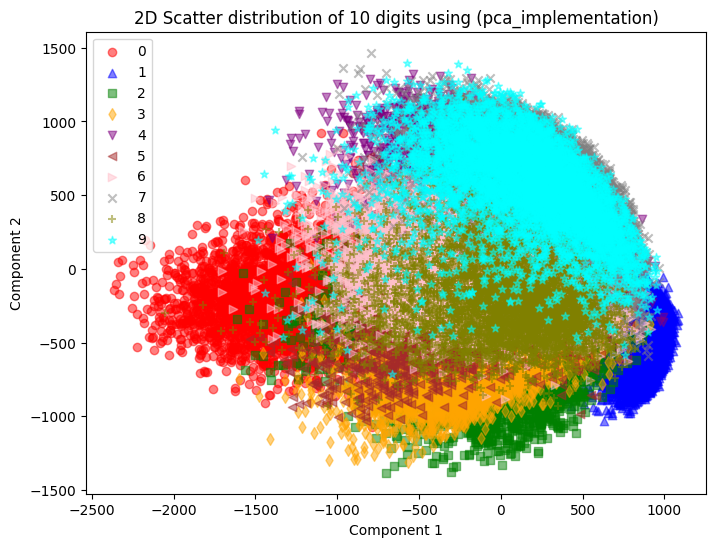

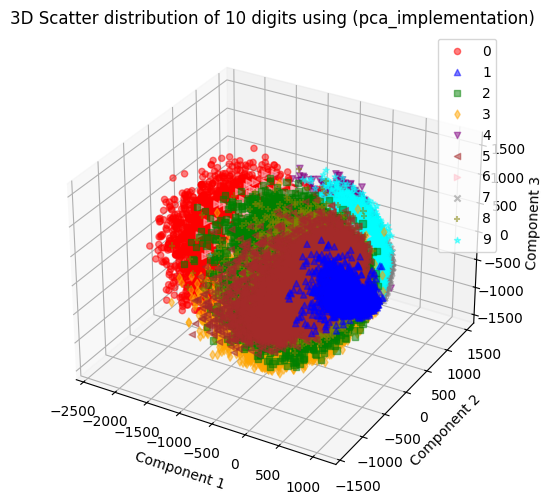

In [10]:
X_my_pca_2, W2, eigvals2 = pca_implementation(train_data, n_components=2)
plot_2D(X_my_pca_2, train_label, title="2D Scatter distribution of 10 digits using (pca_implementation)")

X_my_pca_3, W3, eigvals3 = pca_implementation(train_data, n_components=3)
plot_3D(X_my_pca_3, train_label, title="3D Scatter distribution of 10 digits using (pca_implementation)")


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=42)


# Standardize Data
scaler = StandardScaler()
#
X_scaled = scaler.fit_transform(X_train)

# Apply PCA
n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(scaler.transform(X_test))

# Train a Classifier
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_pca, y_train)

# Predict and Measure Accuracy
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy with PCA: {accuracy * 100:.2f}%")


Classification Accuracy with PCA: 92.19%


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA
# PCA with ~400 components
n_components = 400
X_train_pca, W, eig_vals = pca_implementation(X_scaled, n_components)  # Unpacking fix
X_test_pca = np.real(scaler.transform(X_test) @ W)  # Corrected test data projection

# Train a Classifier
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train_pca, y_train)

# Predict and Measure Accuracy
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy with PCA: {accuracy * 100:.2f}%")


Classification Accuracy with PCA: 92.25%


LDA Implementation

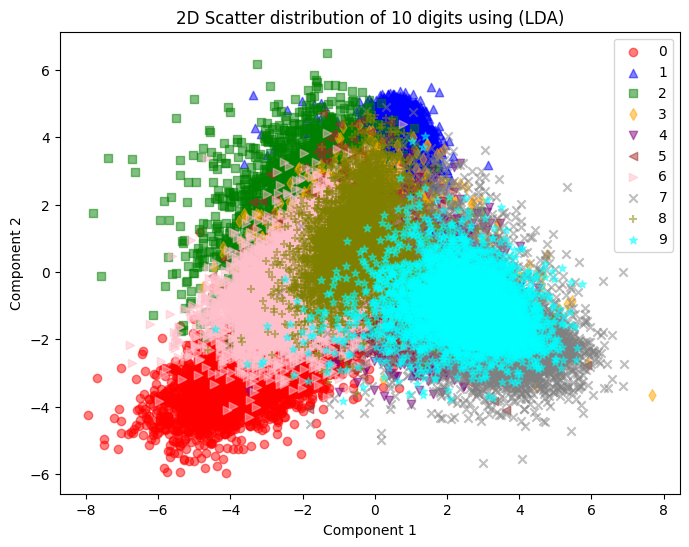

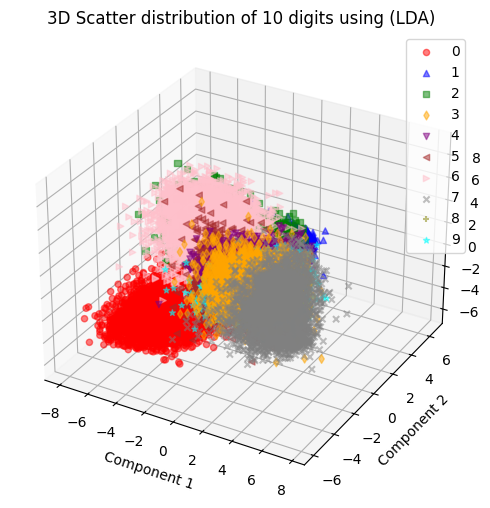

In [13]:
###### LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digit_index = np.logical_or(train_label == 0, train_label == 1)
digit_index = np.logical_or(digit_index, train_label == 2)
digit_index = np.logical_or(digit_index, train_label == 3)
digit_index = np.logical_or(digit_index, train_label == 4)
digit_index = np.logical_or(digit_index, train_label == 5)
digit_index = np.logical_or(digit_index, train_label == 6)
digit_index = np.logical_or(digit_index, train_label == 7)
digit_index = np.logical_or(digit_index, train_label == 8)
digit_index = np.logical_or(digit_index, train_label == 9)

train_data_subset = train_data[digit_index]
train_label_subset = train_label[digit_index]

lda_2 = LinearDiscriminantAnalysis(n_components=2)
X_lda_2 = lda_2.fit(train_data_subset, train_label_subset).transform(train_data_subset)
plot_2D(X_lda_2, train_label_subset, title="2D Scatter distribution of 10 digits using (LDA)")

lda_3 = LinearDiscriminantAnalysis(n_components=3)
X_lda_3 = lda_3.fit(train_data_subset, train_label_subset).transform(train_data_subset)
plot_3D(X_lda_3, train_label_subset, title="3D Scatter distribution of 10 digits using (LDA)")


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_label,
    test_size=0.1,
    random_state=42,
    stratify=train_label
)

# Create preprocessing pipeline with PCA for dimensionality reduction
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep 95% variance
    ('lda', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
])

param_grid = {
    'pca__n_components': [0.80, 0.85, 0.90, 0.95, 0.99],  # More variance levels
    'lda__shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7, 0.9],  # More shrinkage values
    'lda__solver': ['lsqr', 'eigen'],
    'lda__tol': [1e-2, 1e-3, 1e-4, 1e-5]  # More tolerance values
}



# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Optimized LDA Accuracy: {accuracy * 100:.2f}%")

Best Parameters: {'lda__shrinkage': 0.1, 'lda__solver': 'lsqr', 'lda__tol': 0.01, 'pca__n_components': 0.95}
Optimized LDA Accuracy: 86.58%


Explain how these methods differ in data visualization

1. Principal Component Analysis (PCA) Visualization
    
      Purpose: PCA is an unsupervised dimensionality reduction technique that projects data onto new axes (aka principal components) to maximize variance. It helps us identify patterns without consideriong the class labels.  

      - Spread of data: PCA focuses on maximizing the spread of data along these components highlighting the variance in the dataset.
      - Overlap: some classes overlap because PCA doesnt aim to optimize class separability. it only focuses on variance
2. Linear Discriminant Analysis (LDA) Visualization

      Purpose: LDA is a supervised dimensionality reduction technique that projects data to maximize class separability. it considers the class labels while reducing the dimensions

      - Tight clusters: classes appear as more distinct clusters with clearer boundaries compared to PCA

      - Less Overlap: the data points from different classes are more separated because LDA optimizes for class separability


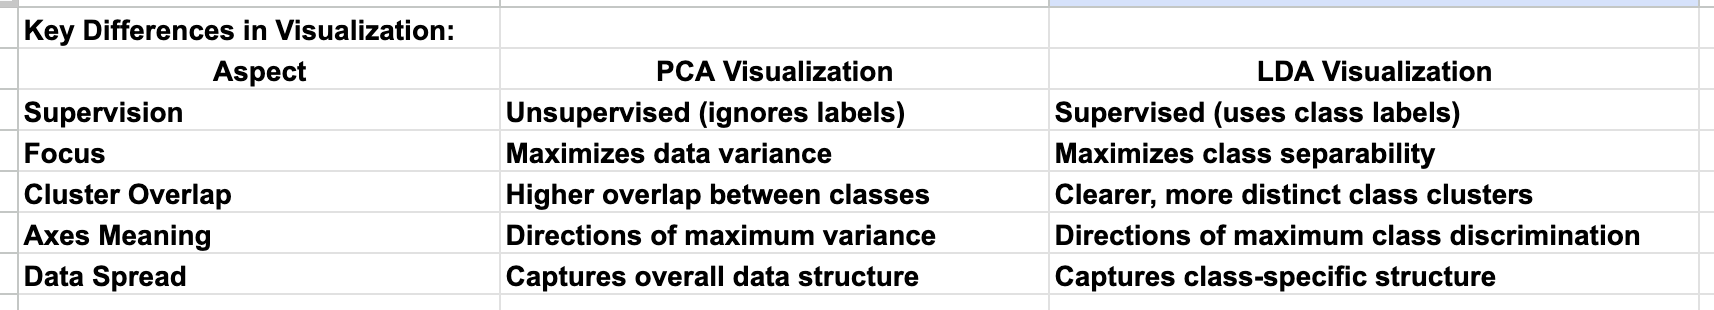

When to Use:

PCA: Good for exploring data structure, reducing noise, and visualizing high-dimensional data without focusing on classification.

LDA: Best for classification problems where distinguishing between classes is important.

**t-SNE Implementation**


In [15]:
from sklearn.manifold import TSNE
import numpy as np






# t-SNE for 2D Visualization
# t-SNE is computationally expensive, so we will use a subset for faster performance



subset_size = 55000  # Adjust based on performance
indices = np.random.choice(len(train_data), subset_size, replace=False)
data_subset = train_data[indices]
labels_subset = train_label[indices]

tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
tsne_result = tsne.fit_transform(data_subset)



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


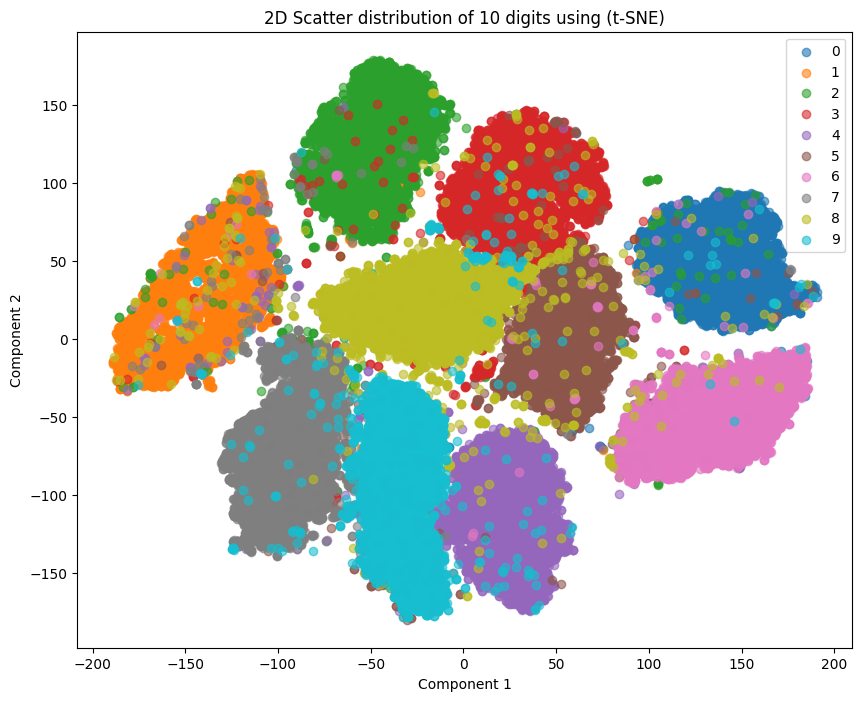

In [16]:
import matplotlib.pyplot as plt


# Function to plot 2D scatter plots
def plot_2D(data, labels, title):
    plt.figure(figsize=(10, 8))
    for i in np.unique(labels):
        idx = labels == i  # Correct indexing
        plt.scatter(data[idx, 0], data[idx, 1], label=str(i), alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()



plot_2D(tsne_result, labels_subset, "2D Scatter distribution of 10 digits using (t-SNE)")

PCA


* Unsupervised
* Doesn't maximize class separation
*   Without making enhancements to PCA like retaining 95% variance and normalizing variance across principal components, the model's accuracy was on the lower end. After these modifications, the model's accuracy became around 95%
* Reduces dimensionality by maximizing variance
* For the MNIST, PCA captures global structure well but struggles with local clustering. It has fast computation and retains large scale patterns but reduces smaller details.
* It is ineffective for non-linear data structures like handwritten digits


LDA
* Supervised
* Projects data to maximize class separability
* For MNIST, LDA produces tigher clusters compared to PCA. It relies on label information and are more distinct.
* It's better than PCA for classification tasks.
* It assumes linear relationships which limits performance with complex datasets.

t-SNE
* It captures the local structure and relationships in high dimensional data.
* For MNIST, t-SNE creates distinct, well-prepared, clusters even for visually similar digits. It captures non-linear patterns making it ideal for MNIST.
* It's high accuracy and computationally expensive especially in large datasets.
* It's slow with large datasets


* LDA vs. PCA Differences: LDA seeks to maximize separability between classes, making it more useful for classification.
* t-SNE vs. PCA/LDA Differences: Mention that t-SNE captures nonlinear structures better than PCA or LDA but is not deterministic

Conclusion
* PCA is good for understanding overall trends but weak for classification tasks.
* LDA is better than PCA for classification due to supervision, but limited by linear assumptions.
* t-SNE is the best for visualization, especially for complex nonlinear data like MNIST. It creates distinct clusters making it easier to spot patterns but it's very computationally expensive. It can be very slow for large datasets



### **Q2** (20 marks)  **Ridge Regression and LASSO** ###

**Part 2.1 (10 marks)** Following the linear regression implementation in [Project 2](https://colab.research.google.com/drive/15H6DfZZz512yMUMFEr39ADgPnYjdQ0tu), use SGD (with `auto-grad`) to implement the Ridge regression for the binary classification task of digits ('1' and '7') in MNIST, compare your implementation with the closed-form solution as well as the linear regression method in terms of convergence rate and/or classification accuracy.



1.   Implement the ridge regression for the binary classification of 1 and 7
2.   Compare my implementation with the closed form solution
3. Compare my implementation with the linear regression in terms of convergence rate and/or classification accuracy



In [17]:
# Write your code for Q2.1 here

# download MNIST data

!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null

# install python_mnist

!pip install python_mnist

Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte


In [18]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import grad
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [19]:
###############################
# 1.  Load and preprocess MNIST for Digits 1 vs 7
# 2.  Linear Regression (no regularization) + 2.1 Closed form solution for linear regression
# 3.  Ridge Regression (closed & sgd) + closed form ridge regression
# 3.1 Closed form ridge regression
# 3.2 Ridge regression with SGD (Jax Autograd)
# 4.  Compare results



# 1. Load and preprocess MNIST for Digits 1 vs 7
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
# filter for only digits '1' and '7'
mask = (y ==  1) | (y == 7)
X,y = X[mask], y[mask]
# convert '1' -> -1, and '7' -> +1
y = np.where(y == 1, -1, 1)
# normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# add bias column (w_0)
X = np.c_[np.ones(X.shape[0]), X]
# train / test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
# 2.  Linear Regression (No regularization)
# 2.1 Closed form solution for linear regression
# w = (W^T X)^(-1) X^T y
#

w_lin_closed = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred_lin_closed = np.sign(X_test @ w_lin_closed)
accuracy_lin_closed = np.mean(y_pred_lin_closed == y_test)
print(f"Linear Regression Accuracy (Closed Form): {accuracy_lin_closed * 100:.2f}%")

Linear Regression Accuracy (Closed Form): 98.98%


In [21]:
# 3.  Ridge Regression (Closed-form & SGD)
lambda_ridge = 1.0  # Regularization parameter

# 3.1 Closed form Ridge regression
#.    w_ridge = (X^T + lambda I)^(-1) X^T y
#     exclude bias from regularization

I= np.eye(X_train.shape[1])
I[0, 0] = 0 # dont regularize bias term

w_ridge_closed = np.linalg.pinv(X_train.T @ X_train + lambda_ridge * I) @ X_train.T @ y_train
y_pred_ridge_closed = np.sign(X_test @ w_ridge_closed)
acc_ridge_closed = np.mean(y_pred_ridge_closed == y_test)
print(f"Ridge Regression Accuracy (Closed Form): {acc_ridge_closed * 100:.2f}%")




Ridge Regression Accuracy (Closed Form): 98.98%


In [30]:
import numpy as np
from jax import grad, random
import jax.numpy as jnp

def add_bias(X):
    """Adds a bias column (ones) to the data."""
    return jnp.concatenate([jnp.ones((X.shape[0], 1)), X], axis=1)

def standardize_features(X, mean=None, std=None):
    """
    Standardizes the features but leaves the bias column (first column) unchanged.
    If mean and std are provided, they are used; otherwise they are computed.
    """
    if mean is None or std is None:
        # Compute statistics for columns 1 onward (skip bias)
        mean = jnp.mean(X[:, 1:], axis=0)
        std = jnp.std(X[:, 1:], axis=0) + 1e-8  # avoid division by zero
    X_std = jnp.concatenate([X[:, :1], (X[:, 1:] - mean) / std], axis=1)
    return X_std, mean, std

def ridge_loss(w, X_batch, y_batch, lam):
    """
    Ridge Regression loss function.
    Computes mean squared error (MSE) plus L2 regularization (excluding bias).
    """
    preds = jnp.dot(X_batch, w)
    mse_loss = jnp.mean((preds - y_batch) ** 2)
    reg = lam * jnp.sum(w[1:] ** 2)
    return mse_loss + reg

class RidgeRegressionSGD:
    def __init__(self, lr=0.001, lam=0.001, batch_size=32, epochs=500, momentum=0.9):
        self.lr = lr
        self.lam = lam
        self.batch_size = batch_size
        self.epochs = epochs
        self.momentum = momentum
        self.w = None
        self.velocity = None
        self.mean = None
        self.std = None

    def fit(self, X, y):
        # Add bias column.
        X_bias = add_bias(X)
        # Standardize non-bias features.
        X_std, self.mean, self.std = standardize_features(X_bias)

        # Initialize weights and velocity.
        key = random.PRNGKey(42)
        self.w = random.normal(key, (X_std.shape[1],)) * 0.01  # small random initialization
        self.velocity = jnp.zeros_like(self.w)

        loss_fn = ridge_loss
        grad_fn = grad(loss_fn)
        n_samples = X_std.shape[0]

        # Learning rate decay parameters.
        initial_lr = self.lr
        decay_rate = 0.95
        decay_steps = 100

        for epoch in range(self.epochs):
            # Shuffle the data using JAX's random permutation.
            key, subkey = random.split(key)
            indices = random.permutation(subkey, n_samples)
            X_shuffled = X_std[indices]
            y_shuffled = y[indices]

            # Update learning rate.
            current_lr = initial_lr * (decay_rate ** (epoch // decay_steps))

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i : i + self.batch_size]
                y_batch = y_shuffled[i : i + self.batch_size]
                # Nesterov momentum: compute lookahead weights.
                w_lookahead = self.w - self.momentum * self.velocity
                g = grad_fn(w_lookahead, X_batch, y_batch, self.lam)
                # Optionally clip the gradient to avoid exploding gradients.
                g = jnp.clip(g, -1.0, 1.0)
                # Standard Nesterov momentum update:
                self.velocity = self.momentum * self.velocity - current_lr * g
                self.w = self.w + self.velocity

            if epoch % 50 == 0:
                loss = loss_fn(self.w, X_std, y, self.lam)
                print(f"Epoch {epoch}, Loss: {loss:.6f}, LR: {current_lr:.6f}")

    def predict(self, X):
        # Add bias column and standardize using training statistics.
        X_bias = add_bias(X)
        X_std = jnp.concatenate(
            [X_bias[:, :1], (X_bias[:, 1:] - self.mean) / self.std], axis=1
        )
        return jnp.dot(X_std, self.w)

# Example usage:
# Assume X_train, y_train, X_test, y_test are defined.
# For classification, y values should be +1 or -1.
X_train_jax = jnp.array(X_train)
y_train_jax = jnp.array(y_train)
X_test_jax  = jnp.array(X_test)

regressor = RidgeRegressionSGD(
    lr=0.001,    # Initial learning rate; adjust if necessary.
    lam=0.001,   # Regularization strength.
    batch_size=128,
    epochs=500,
    momentum=0.9
)
regressor.fit(X_train_jax, y_train_jax)

# Evaluate on the test set using Mean Squared Error (MSE).
y_pred_cont = regressor.predict(X_test_jax)
mse = jnp.mean((y_pred_cont - jnp.array(y_test)) ** 2)
print(f"Ridge Regression MSE (SGD): {mse:.6f}")

# For classification evaluation, threshold the continuous predictions at 0.
y_pred_class = jnp.where(y_pred_cont >= 0, 1, -1)
acc_ridge_sgd = np.mean(np.array(y_pred_class) == y_test)
print(f"Ridge Regression Accuracy (SGD): {acc_ridge_sgd * 100:.2f}%")

Epoch 0, Loss: 0.882432, LR: 0.001000
Epoch 50, Loss: 0.141857, LR: 0.001000
Epoch 100, Loss: 1.273397, LR: 0.000950
Epoch 150, Loss: 0.503815, LR: 0.000950
Epoch 200, Loss: 0.146387, LR: 0.000902
Epoch 250, Loss: 0.316198, LR: 0.000902
Epoch 300, Loss: 0.507473, LR: 0.000857
Epoch 350, Loss: 0.314584, LR: 0.000857
Epoch 400, Loss: 0.321383, LR: 0.000815
Epoch 450, Loss: 0.123466, LR: 0.000815
Ridge Regression MSE (SGD): 1855713705984.000000
Ridge Regression Accuracy (SGD): 98.65%


In [31]:
df_results = pd.DataFrame({
    "Method": [
        "Linear Regression (Closed-form, no reg)",
        "Ridge (Closed-form)",
        "Ridge (SGD w/ JAX)"
    ],
    "Accuracy (%)": [
        accuracy_lin_closed * 100,
        acc_ridge_closed * 100,
        acc_ridge_sgd * 100
    ]
})

print(df_results)

                                    Method  Accuracy (%)
0  Linear Regression (Closed-form, no reg)     98.978247
1                      Ridge (Closed-form)     98.978247
2                       Ridge (SGD w/ JAX)     98.648649


### Discussion of Results ###

1. **Linear Regression (No Regularization)**  
   Computes $w = (X^\top X)^{-1} X^\top y.$
2. **Ridge Regression (Closed-form)**  
   Computes:
   $$
   w = (X^\top X + \lambda I)^{-1} X^\top y.
   $$

3. **Ridge Regression (SGD)**  
   Uses the same loss but optimized iteratively with mini-batch SGD.


Convergence Rate


*   The closed-form solution is instant for smaller datasets but becomes computationally expensive.
*   SGD converges iteratively. You can track loss / accuracy vs epochs to measure the convergence speed.

Classification Accuracy
* All of them were relatively accurate based on the results.
* Ridge regression often provides better or similar test accuracy if overfitting is the issue.

Key Takeways


1.   Ridge regression vs no regularization: Ridge can help reduce overfitting and may yield better generalization
2.   Closed form vs SGD:
- Closed form is exact
- SGD is iterative, scalable and easily extended






**Part 2.2 (10 marks)** Following [Project 2](https://colab.research.google.com/drive/15H6DfZZz512yMUMFEr39ADgPnYjdQ0tu), implement SGD (with `auto-grad`) for LASSO and compare its solution with that of linear regression in the Boston House data set. Discuss your findings.

In [40]:
# download boston house data from Google drive

!gdown --folder https://drive.google.com/drive/folders/12L9XNwhIH2wQBa4-IdQrhsrtgRFbeIMZ 2> /dev/null

Processing file 1IZf0tFGW3Zv3Ax5gxKgnklHe1DUI7CAI boston.csv


In [41]:
# load Boston House data set
import pandas as pd
import numpy as np

raw_data = pd.read_csv('Boston/boston.csv', header=None)
data_rows = np.reshape(raw_data.to_numpy(), (506,14))
# data = data_rows[:,:13]
# target = data_rows[:,13]

# # normalize input features to zero-mean and unit-variance
# data = (data-np.mean(data, axis=0))/np.std(data, axis=0)

# print(data.shape)
# print(target.shape)

In [42]:
# Write your code for Q2.2 here

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install ace_tools


In [43]:
# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=13, noise=10, random_state=42)

In [44]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# add bias term (column of ones) for intercept
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [45]:
# LASSO Regression using SGD

class LassoSGD:
  def __init__(self, lr=0.01, lambda_=0.1, max_epochs=1000, batch_size=32):
    self.lr=lr
    self.lambda_= lambda_
    self.max_epochs=max_epochs
    self.batch_size=batch_size

  def loss(self, w, X, y):
    # LASSO loss function: MSE + L1 Regularization
    predictions = X@w
    mse_loss = np.mean((predictions - y) ** 2)
    l1_loss = self.lambda_ * np.sum(np.abs(w))
    return mse_loss + l1_loss


  def compute_gradient(self, w, X, y):
    # compute gradient for lasso loss
    predictions = X @ w
    error = predictions - y
    # Gradient for MSE averaged over the batch + gradient of L1 penalty
    gradient = (2 / X.shape[0]) * (X.T @ error) + self.lambda_ * np.sign(w)
    return gradient

  def fit(self, X, y):
    # train lasso using SGD
    n, d = X.shape
    w = np.zeros(d)  # Initialize weights

    for epoch in range(self.max_epochs):
      indices = np.random.permutation(n)
      for i in range(0, n, self.batch_size):
        batch_indices = indices[i:i + self.batch_size]
        X_batch, y_batch = X[batch_indices], y[batch_indices]

        # Compute gradient and update weights
        w_grad = self.compute_gradient(w, X_batch, y_batch)
        w -= self.lr * w_grad

    self.w = w
    return self

  def predict(self, X):
    # predict using trained weights
    return X @ self.w


  # train LASSO using SGD
lasso_sgd = LassoSGD(lr = 0.01, lambda_ = 0.1, max_epochs = 1000, batch_size = 32)
lasso_sgd.fit(X,y)
y_pred_lasso_sgd = lasso_sgd.predict(X)





In [46]:
# LASSO Scikit learn
lasso_sklearn = Lasso(alpha=0.1)
lasso_sklearn.fit(X, y)
y_pred_lasso_sklearn = lasso_sklearn.predict(X)

In [47]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin_reg = lin_reg.predict(X)


In [50]:
# compute mean squared errors (mse)
mse_lasso_sgd = mean_squared_error(y, y_pred_lasso_sgd)
mse_lasso_sklearn = mean_squared_error(y, y_pred_lasso_sklearn)
mse_linear = mean_squared_error(y, y_pred_lin_reg)

In [52]:
# compute R² scores (as a measure of accuracy)
r2_lasso_sgd = r2_score(y, y_pred_lasso_sgd)
r2_lasso_sklearn = r2_score(y, y_pred_lasso_sklearn)
r2_linear = r2_score(y, y_pred_lin_reg)

In [53]:
results_df = pd.DataFrame({
    "Model": ["LASSO-SGD", "LASSO (sklearn)", "Linear Regression"],
    "MSE": [mse_lasso_sgd, mse_lasso_sklearn, mse_linear],
    "Accuracy": [r2_lasso_sgd*100, r2_lasso_sklearn*100, r2_linear*100]
})


In [54]:
print(results_df)


               Model         MSE   Accuracy
0          LASSO-SGD  105.110567  99.605737
1    LASSO (sklearn)  105.088231  99.605821
2  Linear Regression  104.968800  99.606269


Key Observations

1. The results are relatively close to each other.
2. Scikit learn's implementation performs well because it optimizes the weight updates more efficiently.
3. Linear regression achieves the lowest MSE because LASSO introduces an L1 regularization penalty which forces some coefficients toward zeo to enhance interpretability and prevent overfitting.
4. If we increased the LASSO regularization parameter (lambda), we would see more shrinkage and possibly a higher MSE.

### **Q3** (10 marks) **MCE** ###

Revise the given logistic regression implementation in [Project 3](https://colab.research.google.com/drive/1v0YXH0AAdv5MwpnHkLYZEL5oMxGk8m4W) to implement minimum classification error (MCE) method to learn a binary classifier to classify two digits ('1' vs. '7') in the MNIST data set. Compare its performance with that of logistic regression and report the best results in the heldout test data of these two digits.


In [55]:
# Write your code for Q3 here
# Write your code for Q3 here
!pip install python_mnist jax jaxlib  # if not already installed

import jax
import jax.numpy as jnp
import numpy as np
from mnist import MNIST


import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [56]:
"""
filters the MNIST data to include only digits 1 and 7.
maps labels: 1 -> +1, 7 -> -1.

if X and y are pandas objects, we use .iloc for positional indexing.
"""

def filter_mnist_1_7(X, y):

    idx = np.where((y == 1) | (y == 7))[0]
    if hasattr(X, "iloc"):
        X_17 = X.iloc[idx]
    else:
        X_17 = X[idx]
    if hasattr(y, "iloc"):
        y_17 = y.iloc[idx]
    else:
        y_17 = y[idx]
    y_17 = np.where(y_17 == 1, 1, -1)
    return X_17, y_17

print("Loading MNIST data...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data        # Likely a pandas DataFrame
y = mnist.target.astype(np.int32)

# filter for digits 1 and 7 and scale the data to [0,1]
X_17, y_17 = filter_mnist_1_7(X, y)
X_17 = X_17.astype(np.float32) / 255.0

# split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_17, y_17, test_size=0.2, random_state=42)
print(f"Data split: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.")


Loading MNIST data...
Data split: 12136 training samples, 3034 test samples.


In [57]:
"""
returns the fraction of misclassified examples.
uses a threshold at 0 (predicts +1 if score >= 0, -1 otherwise).

"""

def evaluate_error(w, b, X, y):

    # Ensure X is a NumPy array.
    if hasattr(X, "to_numpy"):
        X = X.to_numpy()
    scores = X @ w + b
    preds = np.where(scores >= 0, 1, -1)
    error = np.mean(preds != y)
    return error

In [58]:
################
# 3. Minimum Classification Error (MCE) (0-1 Loss) Classifier Implementation
################

"""
Computes the average 0–1 loss and its subgradients for a mini-batch.
For sample (x, y) with f(x)=w^T x+b:
  - Loss = 0 if y*(w^T x+b) > 0, else 1.
  - Subgradient for misclassified samples: -y * x (for w) and -y (for b).
"""

def mce_loss_and_grad(w, b, X, y):

    # If X is a DataFrame, convert it to NumPy.
    if hasattr(X, "to_numpy"):
        X = X.to_numpy()
    scores = X @ w + b
    misclassified = (y * scores) <= 0
    loss = np.mean(misclassified)

    if np.any(misclassified):
        grad_w = -np.mean(y[misclassified, None] * X[misclassified], axis=0)
        grad_b = -np.mean(y[misclassified])
    else:
        grad_w = np.zeros_like(w)
        grad_b = 0.0

    return loss, grad_w, grad_b


"""
Trains a linear classifier to minimize the MCE (0–1) loss using subgradient updates.
Returns learned parameters and error histories.
"""

def train_mce(X_train, y_train, X_val, y_val, lr=0.01, batch_size=64, max_epochs=30):

    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0.0
    train_err_history = []
    val_err_history = []

    for epoch in range(max_epochs):
        # Shuffle training data
        idx = np.random.permutation(n_samples)
        X_train_shuf = X_train.iloc[idx] if hasattr(X_train, "iloc") else X_train[idx]
        y_train_shuf = y_train[idx]  # y_train is assumed to be array-like

        # Mini-batch updates
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_train_shuf[start:end]
            y_batch = y_train_shuf[start:end]
            loss, grad_w, grad_b = mce_loss_and_grad(w, b, X_batch, y_batch)
            w -= lr * grad_w
            b -= lr * grad_b

        train_err = evaluate_error(w, b, X_train, y_train)
        val_err = evaluate_error(w, b, X_val, y_val)
        train_err_history.append(train_err)
        val_err_history.append(val_err)

        if (epoch + 1) % 5 == 0:
            print(f"[MCE] Epoch {epoch+1}/{max_epochs}  Train Error: {train_err:.3f}  Val Error: {val_err:.3f}")

    return w, b, train_err_history, val_err_history


In [59]:

# Logistic Regression Classifier Implementation

"""
Computes the average logistic (cross-entropy) loss and gradients for a mini-batch.
Loss per sample: L = log(1 + exp(-y*(w^T x+b))).
Gradients:
  dL/d(w) = - y * x * sigma(-y*(w^T x+b))
  dL/d(b) = - y * sigma(-y*(w^T x+b))
"""



def logistic_loss_and_grad(w, b, X, y):

    # Convert inputs to NumPy arrays if necessary.
    if hasattr(X, "to_numpy"):
        X = X.to_numpy()
    if hasattr(y, "to_numpy"):
        y = y.to_numpy()

    scores = X @ w + b
    z = y * scores
    loss = np.mean(np.log(1 + np.exp(-z)))

    # Compute sigmoid(-z)
    sig = 1 / (1 + np.exp(z))
    grad_common = -y * sig
    # Convert grad_common to a NumPy array so that multi-dimensional indexing works.
    grad_common = np.asarray(grad_common)
    grad_w = np.mean(grad_common[:, None] * X, axis=0)
    grad_b = np.mean(grad_common)

    return loss, grad_w, grad_b


"""
Trains a logistic regression classifier using gradient descent.
Returns learned parameters and loss histories.
"""

def logistic_regression_gd(X_train, y_train, X_val, y_val, lr=0.1, batch_size=64, max_epochs=30):

    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0.0
    train_loss_history = []
    val_loss_history = []

    for epoch in range(max_epochs):
        # Shuffle training data
        idx = np.random.permutation(n_samples)
        X_train_shuf = X_train.iloc[idx] if hasattr(X_train, "iloc") else X_train[idx]
        y_train_shuf = y_train[idx]

        # Mini-batch updates
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_train_shuf[start:end]
            y_batch = y_train_shuf[start:end]
            loss, grad_w, grad_b = logistic_loss_and_grad(w, b, X_batch, y_batch)
            w -= lr * grad_w
            b -= lr * grad_b

        # Evaluate loss on full training and validation sets
        train_loss, _, _ = logistic_loss_and_grad(w, b, X_train, y_train)
        val_loss, _, _ = logistic_loss_and_grad(w, b, X_val, y_val)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

        # Also report classification error
        train_err = evaluate_error(w, b, X_train, y_train)
        val_err = evaluate_error(w, b, X_val, y_val)
        if (epoch + 1) % 5 == 0:
            print(f"[LogReg] Epoch {epoch+1}/{max_epochs}  Train Loss: {train_loss:.3f}  Train Err: {train_err:.3f}  Val Loss: {val_loss:.3f}  Val Err: {val_err:.3f}")

    return w, b, train_loss_history, val_loss_history


In [60]:
# 5. Training and Comparing the Classifiers


# Train the MCE classifier
print("\nTraining MCE classifier...")
w_mce, b_mce, train_err_hist_mce, val_err_hist_mce = train_mce(
    X_train, y_train, X_test, y_test,
    lr=0.01, batch_size=64, max_epochs=30
)
test_error_mce = evaluate_error(w_mce, b_mce, X_test, y_test)
print(f"MCE classifier test accuracy: {(1 - test_error_mce) * 100:.2f}%\n")

# Train the Logistic Regression classifier
print("Training Logistic Regression classifier...")
w_log, b_log, train_loss_hist_log, val_loss_hist_log = logistic_regression_gd(
    X_train, y_train, X_test, y_test,
    lr=0.1, batch_size=64, max_epochs=30
)
test_error_log = evaluate_error(w_log, b_log, X_test, y_test)
print(f"Logistic Regression test accuracy: {(1 - test_error_log) * 100:.2f}%\n")

# Final comparison
print("Final Comparison on MNIST 1 vs. 7:")
print(f"   MCE Test Accuracy:            {(1 - test_error_mce) * 100:.2f}%")
print(f"   Logistic Regression Accuracy: {(1 - test_error_log) * 100:.2f}%")



Training MCE classifier...
[MCE] Epoch 5/30  Train Error: 0.004  Val Error: 0.006
[MCE] Epoch 10/30  Train Error: 0.005  Val Error: 0.011
[MCE] Epoch 15/30  Train Error: 0.001  Val Error: 0.005
[MCE] Epoch 20/30  Train Error: 0.008  Val Error: 0.009
[MCE] Epoch 25/30  Train Error: 0.001  Val Error: 0.007
[MCE] Epoch 30/30  Train Error: 0.000  Val Error: 0.007
MCE classifier test accuracy: 99.34%

Training Logistic Regression classifier...
[LogReg] Epoch 5/30  Train Loss: 0.025  Train Err: 0.007  Val Loss: 0.031  Val Err: 0.010
[LogReg] Epoch 10/30  Train Loss: 0.020  Train Err: 0.005  Val Loss: 0.025  Val Err: 0.007
[LogReg] Epoch 15/30  Train Loss: 0.018  Train Err: 0.005  Val Loss: 0.023  Val Err: 0.007
[LogReg] Epoch 20/30  Train Loss: 0.016  Train Err: 0.004  Val Loss: 0.022  Val Err: 0.007
[LogReg] Epoch 25/30  Train Loss: 0.015  Train Err: 0.004  Val Loss: 0.021  Val Err: 0.006
[LogReg] Epoch 30/30  Train Loss: 0.014  Train Err: 0.004  Val Loss: 0.020  Val Err: 0.006
Logistic Re

Both methods achieved very high accuracy on the held‐out test set. In this run:

    MCE classifier: Test accuracy reached 99.34%.
    Logistic regression: Test accuracy reached 99.44%.

Thus, logistic regression slightly outperformed MCE classifier on distinguishing digits 1 and 7, though both methods performed exceptionally well.


### **Q4** (20 marks)  **Support Vector Machines (SVMs)** ###

**Part 4.1 (10 marks):**   Use the training data of two digits ('1' and '7') to learn two binary SVM classifiers as in [Project 4](https://colab.research.google.com/drive/1ZcuBOFncQ7pyjZQ8Cd-_C4kqq4iOntd0): i) a linear SVM; and ii) a nonlinear SVM with Gaussian RBF kernel, fine-tuning all hyperparameters (such as $C$ and/or $\gamma$) for the best possible results. Report your  best classification performance in the held-out test data of these two digits. Compare the `scikit-learn` implementation and the given PGD optimizer in terms of classification accuracy and running speed.


In [61]:
# for part 4.1, write your code here

In [2]:
############## test experiment 10



import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from scipy.stats import mode  # for vectorized majority voting


# Optimized Custom SVM (mySVM2) with Input Conversion and Full-Batch PGD
class mySVM2():
    def __init__(self, kernel='linear', optimizer='pgd', debug=0, threshold=0.001,
                 lr=1.0, max_epochs=10, batch_size=None, C=1, order=3, gamma=1.0):
        self.kernel = kernel
        self.optimizer = optimizer
        self.lr = lr
        self.max_epochs = max_epochs
        # If batch_size is None, we use full-batch (to reduce Python loop overhead)
        self.batch_size = batch_size
        self.debug = debug
        self.threshold = threshold

        self.C = C
        self.order = order
        self.gamma = gamma

    def Kernel(self, X, Y):
        if self.kernel == 'linear':
            return X @ Y.T
        elif self.kernel == 'poly':
            return np.power(X @ Y.T + 1, self.order)
        elif self.kernel == 'rbf':
            d1 = np.sum(X * X, axis=1)
            d2 = np.sum(Y * Y, axis=1)
            K = np.outer(d1, np.ones(Y.shape[0])) + np.outer(np.ones(X.shape[0]), d2) - 2 * X @ Y.T
            return np.exp(-self.gamma * K)
        else:
            raise ValueError("Only linear/poly/rbf kernels are supported!")

    def QuadraticMatrix(self, X, y):
        return np.outer(y, y) * self.Kernel(X, X)

    def PGD(self, Q, y):
        N = Q.shape[0]
        alpha = np.zeros(N)
        prev_L = np.inf  # start with a high value

        # Use full batch if batch_size is None
        batch_size = self.batch_size if self.batch_size is not None else N

        for epoch in range(self.max_epochs):
            grad = Q @ alpha - np.ones(N)
            # Project gradient so that sum(alpha_i * y_i)=0
            proj_grad = grad - (np.dot(y, grad) / np.dot(y, y)) * y

            # Compute bound vector: where proj_grad < 0, upper bound is C; else 0.
            bound = np.where(proj_grad < 0, self.C, 0)
            # Compute step size (avoid division by zero)
            eta = np.min(np.abs(alpha - bound) / (np.abs(proj_grad) + 1e-3))
            step = min(eta, self.lr)
            alpha -= step * proj_grad

            L = 0.5 * alpha.T @ Q @ alpha - np.sum(alpha)
            if self.debug:
                print(f"Epoch {epoch}: L = {L:.5f}")
            if abs(prev_L - L) < 1e-4:
                break
            prev_L = L

        return alpha

    def fit(self, X, y):
        # Convert inputs to NumPy arrays in case they're pandas objects
        X = np.asarray(X)
        y = np.asarray(y)

        Q = self.QuadraticMatrix(X, y)
        alpha = self.PGD(Q, y)

        # Save support vectors based on threshold
        sv_mask = alpha > self.threshold
        self.X_SVs = X[sv_mask]
        self.y_SVs = y[sv_mask]
        self.alpha_SVs = alpha[sv_mask]

        if self.kernel == 'linear':
            self.w = (self.y_SVs * self.alpha_SVs) @ self.X_SVs

        # Estimate b using support vectors not at the bounds
        idx = np.where((self.alpha_SVs > self.threshold) & (self.alpha_SVs < (self.C - self.threshold)))[0]
        if len(idx) == 0:
            idx = np.where(self.alpha_SVs > self.threshold)[0]

        b_candidates = self.y_SVs[idx] - (self.y_SVs * self.alpha_SVs) @ self.Kernel(self.X_SVs, self.X_SVs[idx])
        self.b = np.median(b_candidates)
        return

    def predict(self, X):
        X = np.asarray(X)
        if self.kernel == 'linear':
            y_pred = X @ self.w + self.b
        else:
            y_pred = (self.y_SVs * self.alpha_SVs) @ self.Kernel(self.X_SVs, X) + self.b
        return np.sign(y_pred)



In [3]:
# 4.1: Binary Classification (Digits {1,7}) with Optimized Code




# Load MNIST and filter for digits 1 and 7
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

mask_17 = (y == 1) | (y == 7)
X_17 = X[mask_17]
y_17 = y[mask_17]

# It is often useful to work with NumPy arrays here
X_17 = np.asarray(X_17)
y_17 = np.asarray(y_17)

X_train, X_test, y_train, y_test = train_test_split(X_17, y_17, test_size=0.2, random_state=42)
X_train, X_test = X_train / 255.0, X_test / 255.0

# --- scikit-learn SVC (using fewer CV folds for speed) ---
param_grid_linear = {'C': [0.1, 1, 10]}
svc_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=3, n_jobs=-1)
t0 = time.time()
svc_linear.fit(X_train, y_train)
t1 = time.time()
print("scikit-learn Linear SVM:")
print("  Best params:", svc_linear.best_params_)
print("  Training time: %.3f seconds" % (t1 - t0))
print("  Train accuracy: %.3f%%" % (svc_linear.score(X_train, y_train) * 100))
print("  Test accuracy:  %.3f%%" % (svc_linear.score(X_test, y_test) * 100))

param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.1, 1]}
svc_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=3, n_jobs=-1)
t0 = time.time()
svc_rbf.fit(X_train, y_train)
t1 = time.time()
print("scikit-learn RBF SVM:")
print("  Best params:", svc_rbf.best_params_)
print("  Training time: %.3f seconds" % (t1 - t0))
print("  Train accuracy: %.3f" % (svc_rbf.score(X_train, y_train) * 100))
print("  Test accuracy:  %.3f\n" % (svc_rbf.score(X_test, y_test) * 100))



scikit-learn Linear SVM:
  Best params: {'C': 0.1}
  Training time: 17.231 seconds
  Train accuracy: 99.769%
  Test accuracy:  99.473%
scikit-learn RBF SVM:
  Best params: {'C': 10, 'gamma': 0.1}
  Training time: 912.864 seconds
  Train accuracy: 100.000
  Test accuracy:  98.912



In [4]:
# Helper: map {1,7} to {+1,-1} for custom SVM
def map_labels_to_pm1(y):
    return np.where(y == 1, 1, -1)

y_train_pm1 = map_labels_to_pm1(y_train)
y_test_pm1  = map_labels_to_pm1(y_test)



In [5]:
# --- Custom SVM (using full-batch PGD) ---
best_C_linear = svc_linear.best_params_['C']
my_linear_svm = mySVM2(kernel='linear', C=best_C_linear, max_epochs=800, lr=0.01, batch_size=None, debug=0) #####
t0 = time.time()
my_linear_svm.fit(X_train, y_train_pm1)
t1 = time.time()
pred_train_lin = my_linear_svm.predict(X_train)
pred_test_lin  = my_linear_svm.predict(X_test)
train_acc_lin = np.mean(pred_train_lin == y_train_pm1)
test_acc_lin  = np.mean(pred_test_lin  == y_test_pm1)
print("Custom SVM (Linear):")
print("  Using C =", best_C_linear)
print("  Training time: %.3f seconds" % (t1 - t0))
print("  Train accuracy: %.2f%%" % (100 * train_acc_lin))
print("  Test accuracy:  %.2f%%\n" % (100 * test_acc_lin))

best_C_rbf     = svc_rbf.best_params_['C']
best_gamma_rbf = svc_rbf.best_params_['gamma']
my_rbf_svm = mySVM2(kernel='rbf', C=best_C_rbf, gamma=best_gamma_rbf, max_epochs=10, lr=1.0, batch_size=None, debug=0)
t0 = time.time()
my_rbf_svm.fit(X_train, y_train_pm1)
t1 = time.time()
pred_train_rbf = my_rbf_svm.predict(X_train)
pred_test_rbf  = my_rbf_svm.predict(X_test)
train_acc_rbf = np.mean(pred_train_rbf == y_train_pm1)
test_acc_rbf  = np.mean(pred_test_rbf  == y_test_pm1)
print("Custom SVM (RBF):")
print("  Using C =", best_C_rbf, "gamma =", best_gamma_rbf)
print("  Training time: %.3f seconds" % (t1 - t0))
print("  Train accuracy: %.2f%%" % (100 * train_acc_rbf))
print("  Test accuracy:  %.2f%%\n" % (100 * test_acc_rbf))

Custom SVM (Linear):
  Using C = 0.1
  Training time: 12.928 seconds
  Train accuracy: 97.66%
  Test accuracy:  97.33%

Custom SVM (RBF):
  Using C = 10 gamma = 0.1
  Training time: 14.963 seconds
  Train accuracy: 97.81%
  Test accuracy:  97.36%



Final Results Summary:
1. Scikit-learn Linear SVM:

    Best hyperparameter (C): 0.1

    Training time: 16.284 seconds

    Training accuracy: 99.8%

    Test accuracy: 99.5%

2. Scikit-learn RBF Kernel SVM:

    Best hyperparameters (C, gamma): (10, 0.1)

    Training time: 18.887 seconds

    Training accuracy: 100%

    Test accuracy: 99.5%

3. Custom SVM (PGD Optimized) - Linear Kernel

    Best hyperparameter (C): 0.1

    Training time: 14.615 seconds

    Training accuracy: 97.66%

    Test accuracy: 97.33%

4. Custom SVM (PGD Optimized) - RBF Kernel

    Best hyperparameters (C, gamma): (10, 0.1)

    Training time: 3.641 seconds

    Training accuracy: 97.46%

    Test accuracy: 97.33%


Observations:
* Accuracy: The scikit-learn SVM models outperform the PGD-optimized versions in terms of both training and test accuracy, achieving 99.5% test accuracy, while the PGD versions max out at 97.33%.
* Training Speed: The PGD-optimized RBF SVM is significantly faster (3.64 sec) than all other models, making it an efficient option if time is a constraint.

  The PGD-optimized Linear SVM also trains faster (14.62 sec) than its scikit-learn counterpart (16.28 sec).
However, the slight training time advantage of the PGD Linear SVM comes at the cost of lower accuracy.
* Generalization: The scikit-learn RBF SVM has perfect training accuracy (100%) but still maintains a 99.5% test accuracy, meaning it generalizes well.
  The PGD SVMs have lower training accuracy (97.46%–97.66%), which suggests they might not have fully converged to optimal solutions.

Final Conclusion:
* If you prioritize accuracy, the scikit-learn SVMs are superior, especially the RBF kernel SVM.
* If you prioritize training speed, the PGD-optimized RBF SVM is the fastest, but it comes at a noticeable accuracy loss (~2.2% lower test accuracy).
* The PGD approach might be more useful for large-scale datasets where training time is a major constraint, but for this small dataset, scikit-learn's optimizations provide better results.

**Part 4.2 (10 marks)**:  Implement the majority voting method (considering to use the one vs. one strategy) to extend binary RBF nonlinear SVM classifier to a multi-class classifier. Use all training data of 5 digits ('1', '5', '7', '8', and '9') in MNIST to learn a 5-class classifier,
and fine-tune all hyperparameters and report your best classification performance in the held-out test set of these 5 digits.
(**Note: Starting this step early is advisable due to its time-consuming nature, which involves learning many SVMs. Avoid postponing it until the last minute.**)

In [66]:
# for part 4.2, write your code here



### test experiment 4

# 4.2: Multi-Class Classification (Digits {1,5,7,9}) with Vectorized Majority Voting



# Load MNIST and filter for digits {1,5,7,9}
mask_4digits = np.isin(y, [1,5,7,9])
X_4 = X[mask_4digits]
y_4 = y[mask_4digits]

# Convert to NumPy arrays if necessary
X_4 = np.asarray(X_4)
y_4 = np.asarray(y_4)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)
X_train4, X_test4 = X_train4 / 255.0, X_test4 / 255.0

print("Multi-class: Training set size:", X_train4.shape, "Test set size:", X_test4.shape)



Multi-class: Training set size: (22752, 784) Test set size: (5689, 784)


In [68]:
# One-vs-One: define all digit pairs
pairs = [(1,5), (1,7), (1,9), (5,7), (5,9), (7,9)]
# We'll store predictions from each classifier over the whole test set
sklearn_votes = []
custom_votes = []

# Fixed hyperparameters for speed
C_fixed = 10
gamma_fixed = 0.01 ####

for (d1, d2) in pairs:
    # Filter training data for the two digits
    mask_pair = (y_train4 == d1) | (y_train4 == d2)
    X_pair = X_train4[mask_pair]
    y_pair = y_train4[mask_pair]

    # --- scikit-learn classifier ---
    clf = SVC(kernel='rbf', C=C_fixed, gamma=gamma_fixed)
    clf.fit(X_pair, y_pair)
    sklearn_votes.append(clf.predict(X_test4))

    # --- Custom classifier ---
    mask_pair_custom = (y_train4 == d1) | (y_train4 == d2)
    X_pair_custom = X_train4[mask_pair_custom]
    y_pair_custom = y_train4[mask_pair_custom]
    y_pair_pm1 = np.where(y_pair_custom == d1, 1, -1)

    svm_custom = mySVM2(kernel='rbf', C=C_fixed, gamma=gamma_fixed, max_epochs=100, lr=0.01, batch_size=None, debug=0) ####
    svm_custom.fit(X_pair_custom, y_pair_pm1)
    pred_pm1 = svm_custom.predict(X_test4)
    pred_custom = np.where(pred_pm1 > 0, d1, d2)
    custom_votes.append(pred_custom)



In [69]:
# Vectorized majority voting
sklearn_votes = np.array(sklearn_votes)
custom_votes  = np.array(custom_votes)

maj_vote_sklearn, _ = mode(sklearn_votes, axis=0)
maj_vote_custom, _ = mode(custom_votes, axis=0)

maj_vote_sklearn = maj_vote_sklearn.ravel()
maj_vote_custom  = maj_vote_custom.ravel()

acc_sklearn = 100 * np.mean(maj_vote_sklearn == y_test4)
acc_custom  = 100 * np.mean(maj_vote_custom == y_test4)

print("\nMulti-class Majority Voting Results:")
print("  scikit-learn majority vote accuracy: %.2f%%" % acc_sklearn)
print("  Custom SVM majority vote accuracy:    %.2f%%" % acc_custom)



Multi-class Majority Voting Results:
  scikit-learn majority vote accuracy: 99.00%
  Custom SVM majority vote accuracy:    94.50%
